# Acts of suicide exploration

## Preliminary wrangling

This document explores a dataset containing act of suicides for approximately 23,000 age range records.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt


In [1]:
%pip install pycountry 
%pip install geopandas

  Using cached pycountry-22.3.5.tar.gz (10.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ykska\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=211dbe0408729a9e2ada0fa5c4c39965a74ce29c82ce22f2d12ef5704af38a3a
  Stored in directory: c:\users\ykska\appdata\local\pip\cache\wheels\47\15\92\e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
import pycountry
import geopandas

In [ ]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('master.csv')

### Rename

In [ ]:
df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


### Arrange the dataset

In [ ]:
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(np.int64)
df["age"] = df["age"].str.replace("5-14 years","05-14 years")

### **Sex vs Age range** 

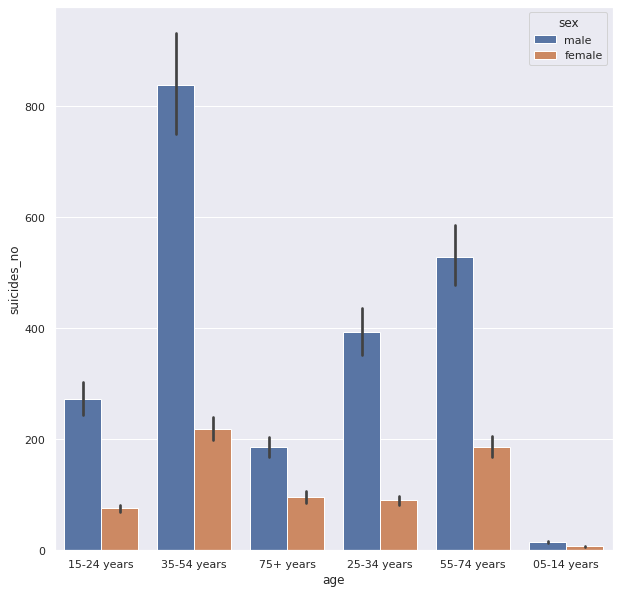

In [ ]:
sns.barplot(data=df, x="age", y="suicides_no", hue="sex")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


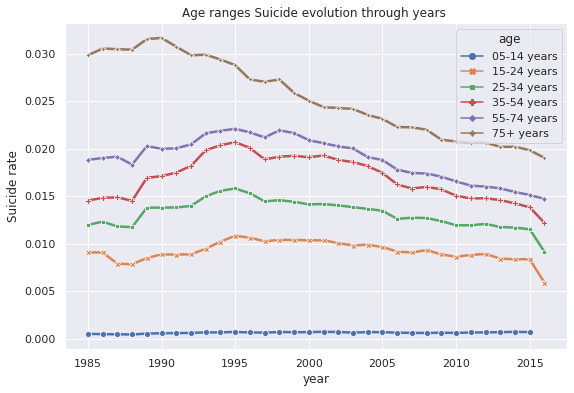

In [ ]:
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.title('Age ranges Suicide evolution through years ')
plt.ylabel('Suicide rate')
plt.show()

### **Sex vs Suicide** 

In [ ]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.title('Suicide evolution through years')

plt.show()

Text(0.5, 1.0, 'Men suicide number evolution from 1985 to 2015')

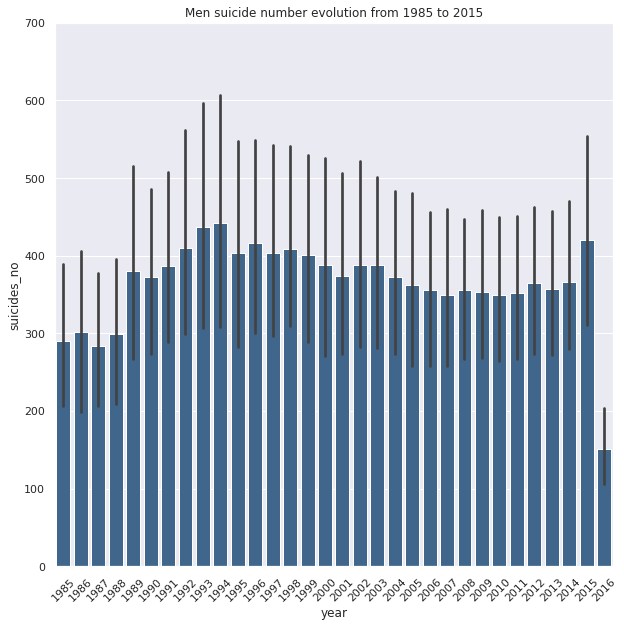

In [ ]:
sns.barplot(data=df_men, x=df_men.year, y=df_men.suicides_no, color=(0.2, 0.4, 0.6, 0.6))

plt.xticks(rotation = 45)
plt.ylim(0,700)

plt.title('Men suicide number evolution from 1985 to 2015')

Text(0.5, 1.0, 'Women suicide number evolution from 1985 to 2015')

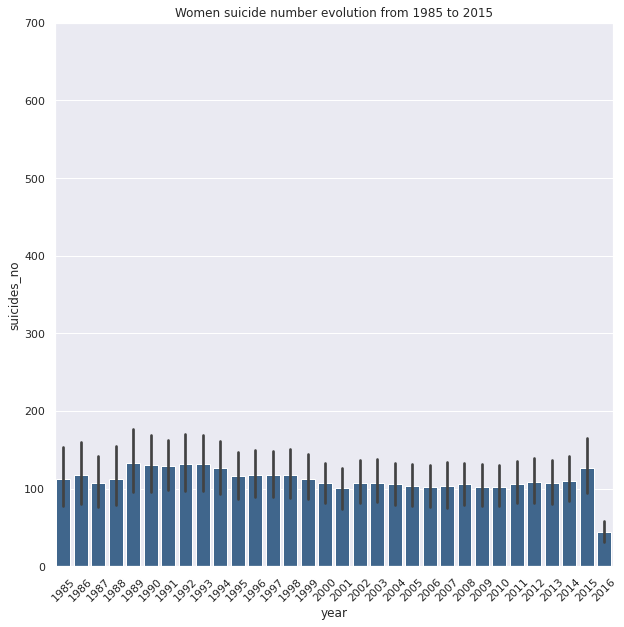

In [ ]:
sns.barplot(data=df_women,  x=df_women.year, y=df_women.suicides_no, color=(0.2, 0.4, 0.6, 0.6))

plt.xticks(rotation = 45)
plt.ylim(0,700)

plt.title('Women suicide number evolution from 1985 to 2015')

No matter which year it is, the suicides number of male are about three times higher than of female. How about the age?

In every single year wr plotted, the suicide number is higher with men rather than woman so lett's check the age.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


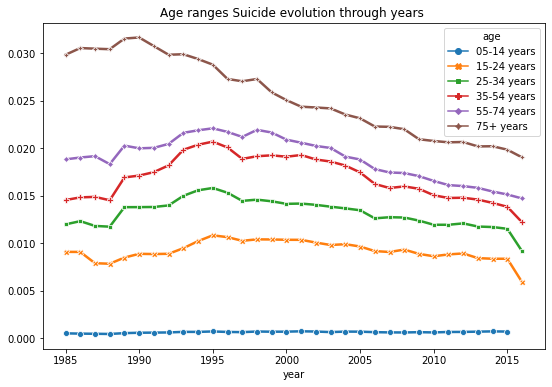

In [ ]:
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.title('Age ranges Suicide evolution through years ')
plt.ylabel('Suicide rate')
plt.show()

From 1985 to 2015, the suicide number is higher to 75+ years, and it's lower to 05-14 years.
What about the generation? 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


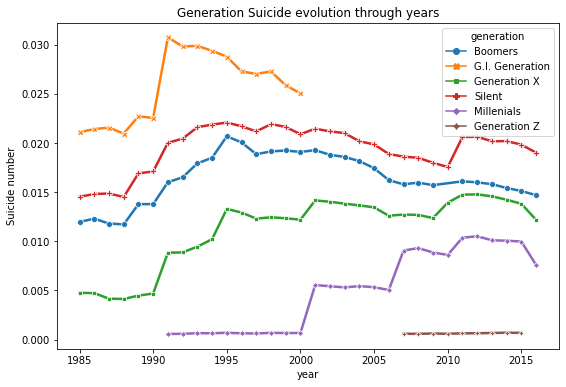

In [ ]:
df_generation = df.groupby(["year", "generation"])["suicides_no", "population"].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_generation_reset.suicides_no*100/df_generation_reset.population, hue = "generation", 
            data = df_generation_reset, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.title('Generation Suicide evolution through years')
plt.ylabel('Suicide number')
plt.show()

Prior to 2000, the G.I. generation had the highest suicide rate, also known as the WW2 generation. This generation experienced economic and social turmoil as they suffered from the pre-World War II global depression, when incomes, profits and taxes were greatly reduced.

Did this kind of social influence increase the G.I. suicide rate? generation? The suicide rate is not that high compared to the post-2000 silent generation.

Interestingly, suicide rates among Gen X and millennials are increasing step by step. Furthermore, suicide rates skyrocket when the average age of a generation exceeds 20. Does this mean that suicide rates increase when young people become independent from their parents? In other words, healthy families contribute to suicide rates. Let's see.

### Let's arrange the dataset. Let's go trough countries


In [ ]:
df1 = df.groupby("country")["suicides_no"].sum()
country_name = list(df1.index.get_level_values(0))
len(country_name)

101

We'll map the suicide rate afterward, so we need to transfer the country name into country code.
We choose alpha3 country code.

In [ ]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

In [ ]:
country_not_in_list = [i for i in country_name[:] if i not in countries.keys()]
country_not_in_list

['Czech Republic',
 'Macau',
 'Republic of Korea',
 'Saint Vincent and Grenadines']

Before ploting the suicide rate of each countries, let's calcuate the suicide rate for each year, and then take the average of number as rate.






In [ ]:
df_suino = df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum
df_total.head(10)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

In [ ]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

Let's plot countries

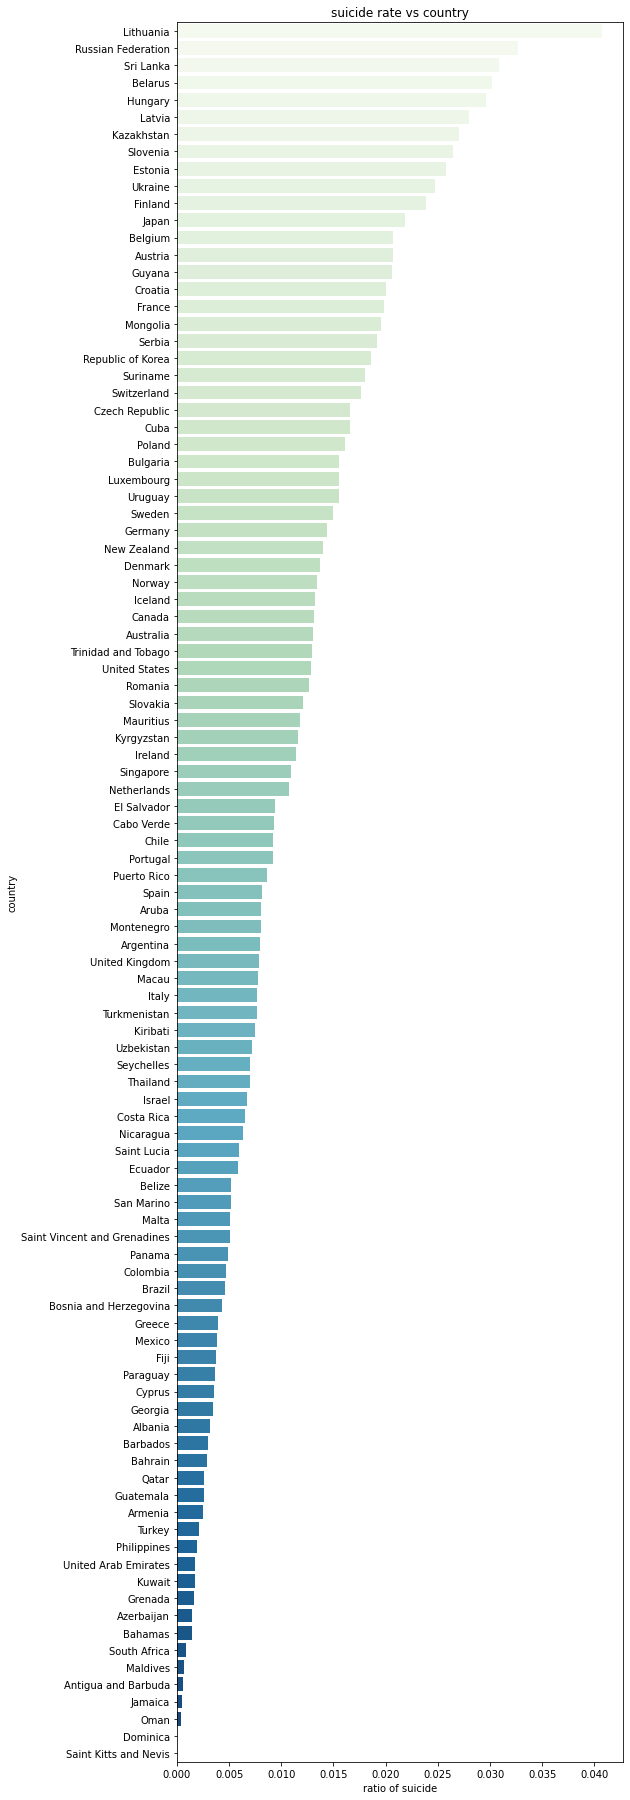

In [ ]:
plt.figure(figsize=(8,32))
sns.barplot(x=country_suicide[:],y=country_list[:], palette="GnBu")
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("Suicide rate vs country")
plt.show()

Let's define a new data frame with country code and suicde rate as columns

In [ ]:
new_country_dict = {}
new_country_dict["iso_a3"] = list(country_dict.keys())
new_country_dict["suicide_rate"] = list(country_dict.values())
new_country_df = pd.DataFrame(new_country_dict)
new_country_df.head()

iso_a3  suicide_rate
0              Albania      0.003137
1  Antigua and Barbuda      0.000541
2            Argentina      0.007911
3              Armenia      0.002475
4                Aruba      0.008097

Let's use geopandas library to get information of countries, including coordinate.

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

Merge two dataframe together.


In [ ]:
result = pd.merge(world, new_country_df, on = "iso_a3")
result.head()

Empty GeoDataFrame
Columns: [pop_est, continent, name, iso_a3, gdp_md_est, geometry, suicide_rate]
Index: []



Countries with highest suicide rate are mainly former soviet union countries, in easten europe. Japan and Korea also have a high suicide rate
Then let's get through the disintegration of Soviet Union.

Firstly, see what happened to the suicide rate year by year.

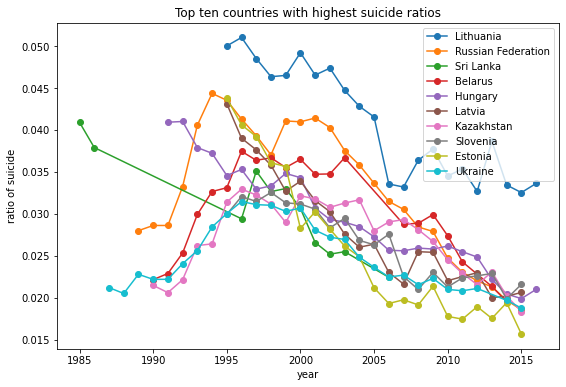

In [ ]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.title('Top ten countries with highest suicide ratios')
plt.legend()
plt.show()

It is clear that suicide rates have increased dramatically since 1990 in several of the top 10 countries. In 1990-2000, the percentage was still high in other countries as well. The economy and the transition to democracy in the former Soviet Union countries may be the main reason for this. There have been numerous studies of increased mortality for alcoholism, financial hardship, depression, etc., but none have accepted them as the most important factor in the mortality crisis. let's check

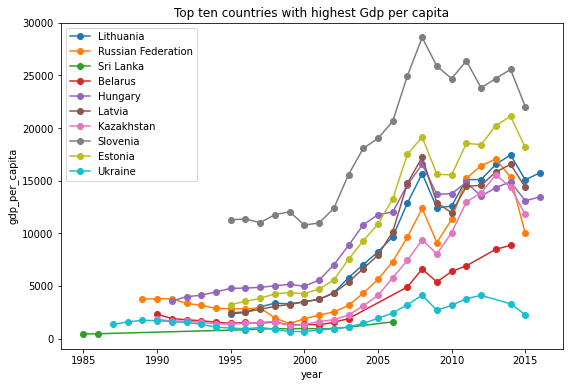

In [ ]:
plt.figure(figsize = (9,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in country_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.title('Top ten countries with highest Gdp per capita')
plt.legend()
plt.show()

From this image we can see that the gdp_per_capita has no differece during 1990 to 2000. In other words, the economic situation were remain stagnant and  some countries got worse until 2002, after 2005, all countries' gdp start growing. 

We also know that the whole gdp_per_capita dropped within 2008 because of the financial crisis.  However, these ratio were still better than that before 2000. To see the relationship between suicide rate and gdp_per_capita, we plot the regression plot of two parameters. 

## Bivariate exploration

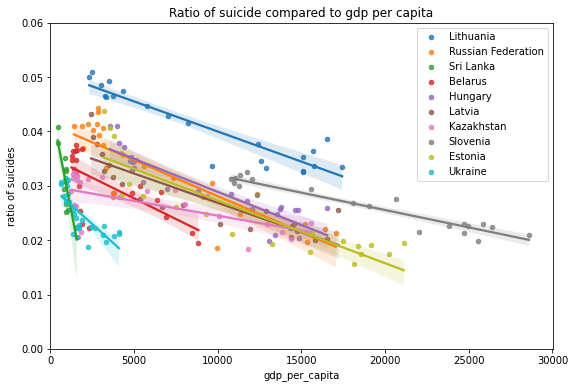

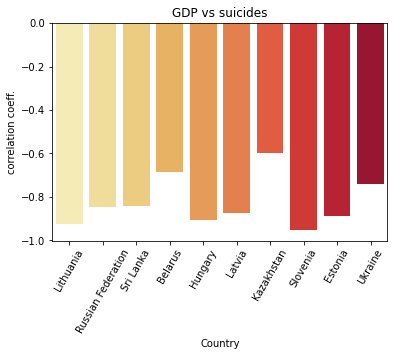

In [ ]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    sns.regplot(x=df_gdp[country].values, y=df_total[country].values, label = country, scatter_kws={'s':20})
plt.xlabel("gdp_per_capita")
plt.ylabel("ratio of suicides")
plt.title('Ratio of suicide compared to gdp per capita')
plt.ylim(0,0.06)

plt.xlim(0)
plt.legend()
plt.show()

corr_eff = {}
for country in country_list[:10]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,df_total[country].values)
    corr_eff[country] = float(r_value)
    
sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "YlOrRd")
plt.xticks(rotation = 60)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

Amazing! The suicide rate is highly correlated to the gdp_per_capita of top10 countries. Let's find out whether others have the same trend. 


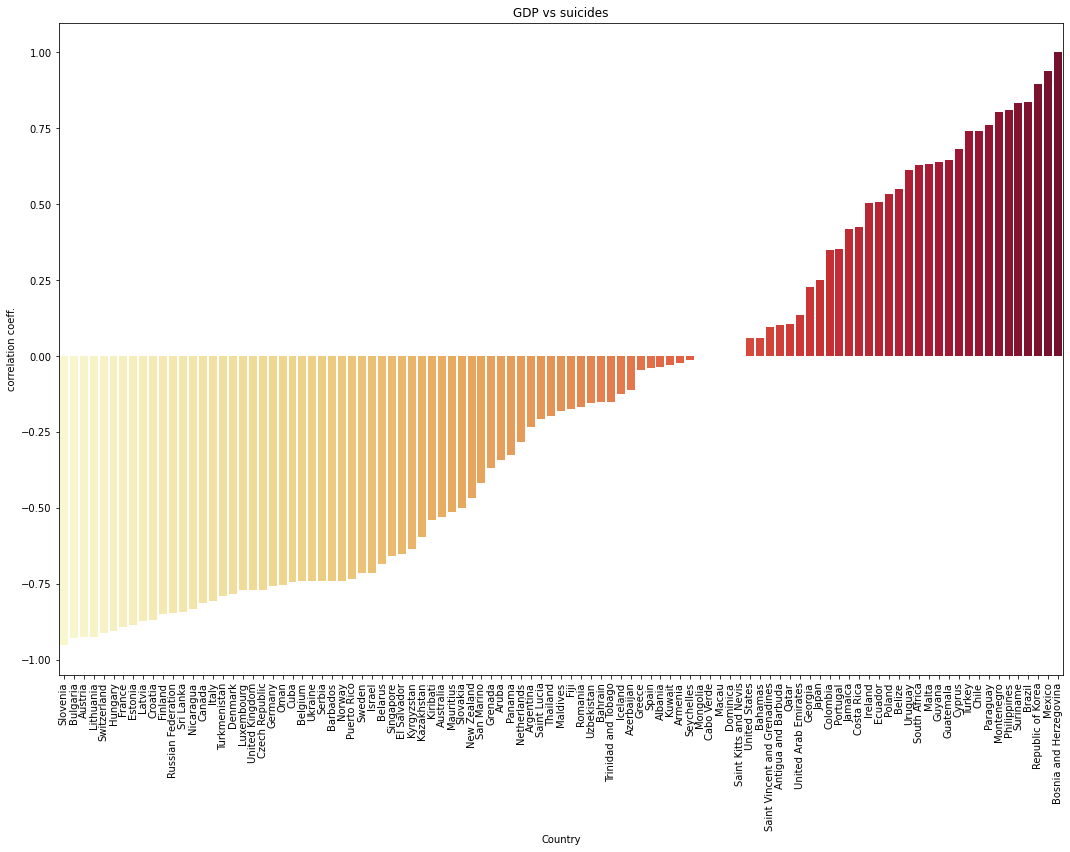

In [ ]:
corr_eff = {}
p_value_eff = {}
for country in country_list[:]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values, df_total[country].values)
    corr_eff[country] = float(r_value)
    p_value_eff[country] = float(p_value)

gdp_tup = list(corr_eff.items())
gdp_tup.sort(key= lambda pair:pair[1], reverse = False)
dgp_relation = {a[0]:a[1] for a in gdp_tup}

plt.figure(figsize=(18,12))
sns.barplot(x=list(dgp_relation.keys()), y=list(dgp_relation.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

Lots of countries' suicide rate are negatively high related to gdp_per_capita, but there are some countries have opposite outcome. It's impressive.

Next, we calculate how many countries with correlation coefficient below -0.6 . 

In [ ]:
high_relation_gdp = {a:b for a,b in dgp_relation.items() if b <= -0.6}
print(len(high_relation_gdp))
high_relation_gdp

36


{'Slovenia': -0.9529455791278115,
 'Bulgaria': -0.9287679102475701,
 'Austria': -0.9259200512084546,
 'Lithuania': -0.9239757987267332,
 'Switzerland': -0.9109503853299822,
 'Hungary': -0.9040354533627301,
 'France': -0.891033016219988,
 'Estonia': -0.8871441228139314,
 'Latvia': -0.8730699831833395,
 'Croatia': -0.8688905854455011,
 'Finland': -0.8510603475107353,
 'Russian Federation': -0.8447320241371793,
 'Sri Lanka': -0.8423723520534465,
 'Nicaragua': -0.8339461195785591,
 'Canada': -0.8137269827924933,
 'Italy': -0.8058989652804354,
 'Turkmenistan': -0.789798470389873,
 'Denmark': -0.785030750255649,
 'Luxembourg': -0.7712677174711061,
 'United Kingdom': -0.7709229981372079,
 'Czech Republic': -0.7706689026781656,
 'Germany': -0.7567584036061585,
 'Oman': -0.7547353920453065,
 'Cuba': -0.7437036777206897,
 'Belgium': -0.7416790406841788,
 'Ukraine': -0.7413562367777868,
 'Serbia': -0.7411928190991895,
 'Barbados': -0.7409526707249006,
 'Norway': -0.7406431335510837,
 'Puerto Rico

About one third countries have high relationship with gdp_per_capita. We can say that gdp is another reason of high suicide rate.

Following are the countries which relation coefficient are higher than 0.6 .

In [ ]:
positive_relation_gdp = {a:b for a,b in corr_eff.items() if b > 0.6}
positive_relation_tup = list(positive_relation_gdp.items())
positive_relation_tup.sort(key= lambda pair:pair[1], reverse = True)
positive_relation = {a[0]:a[1] for a in positive_relation_tup}
print(len(positive_relation))
positive_relation

16


{'Bosnia and Herzegovina': 0.9999999999999999,
 'Mexico': 0.9392731898535472,
 'Republic of Korea': 0.8967892885653613,
 'Brazil': 0.8356111067311864,
 'Suriname': 0.8333078326024657,
 'Philippines': 0.8099497394094539,
 'Montenegro': 0.8042382321252367,
 'Paraguay': 0.7599968993976424,
 'Chile': 0.7412265208253951,
 'Turkey': 0.7398789818429371,
 'Cyprus': 0.6812947745988278,
 'Guatemala': 0.6460477591267608,
 'Guyana': 0.6379567025207803,
 'Malta': 0.6334189190517482,
 'South Africa': 0.6287573335302014,
 'Uruguay': 0.61206046817105}

Let's take a look at suicide rate and gdp_per_capita of these countries.


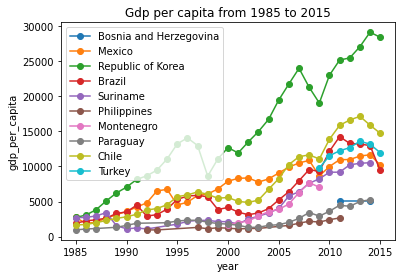

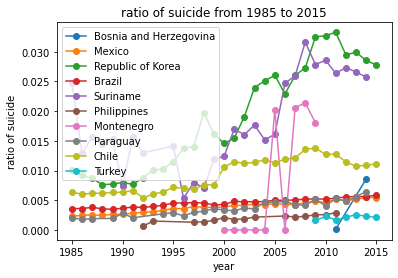

In [ ]:
city_list = list({a:b for a,b in positive_relation.items()})
for country in city_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o", )
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.title('Gdp per capita from 1985 to 2015')
plt.show()

for country in city_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.title('ratio of suicide from 1985 to 2015')

plt.legend()
plt.show()

It's weird that the gdp_per_capita and suicide rate of Korea are growing faster. Does it mean that there are social problems that cause the situation like that!? 

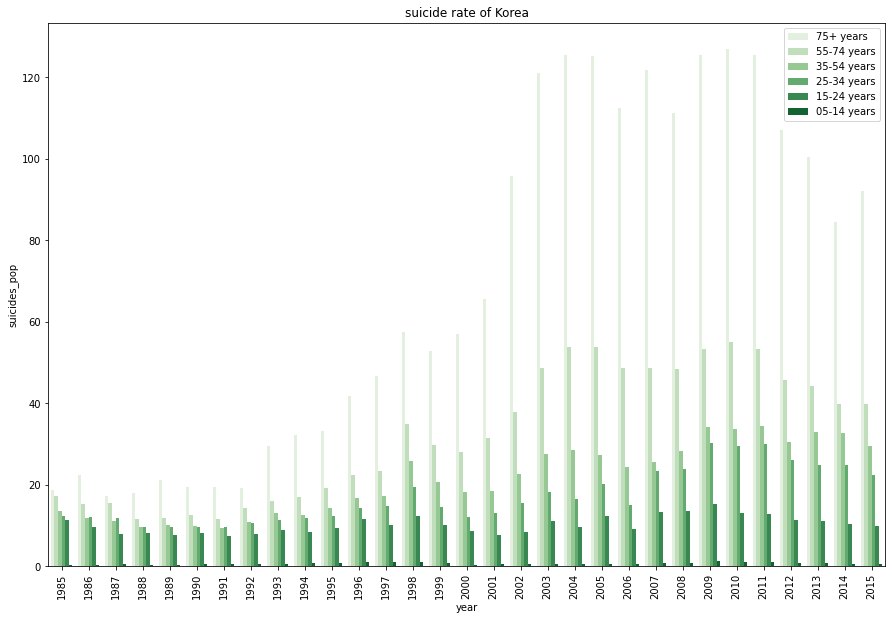

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x="year", y="suicides_pop", hue="age",
            ci = None,data = (df[df["country"] == "Republic of Korea"]) , palette = 'Greens' )
plt.xticks(rotation = 90)
plt.title("suicide rate of Korea" )
plt.legend()    
plt.show()

What's going on with old people in Korea!? After 2000, the suicide rate of people over 75 years old is almost double. Was Korea society not friendly to the old people or the enviroment depressed the old people? As we mentioned early, age is a factor of high suicide rate. A country should setup social welfare to take care of old people just in case.

On the other hand, the rate of people whose age is over 24 are growing after 1992. This phenomenon reflects the increasing burden on society, like salary,  academic pressure, family and so on.

Last but not least, how about the countries with high suicide rate not related to the gdp_per_capita!? Let's see which countries meet the condition.

In [ ]:
without_relation_gdp = {a:b for a,b in corr_eff.items() if -0.3 < b < 0.3}
no_relation_gdp = [i for i in country_list[:20] if i in without_relation_gdp.keys()]
no_relation_gdp

['Japan', 'Mongolia']

Plot the age structure of Japan.

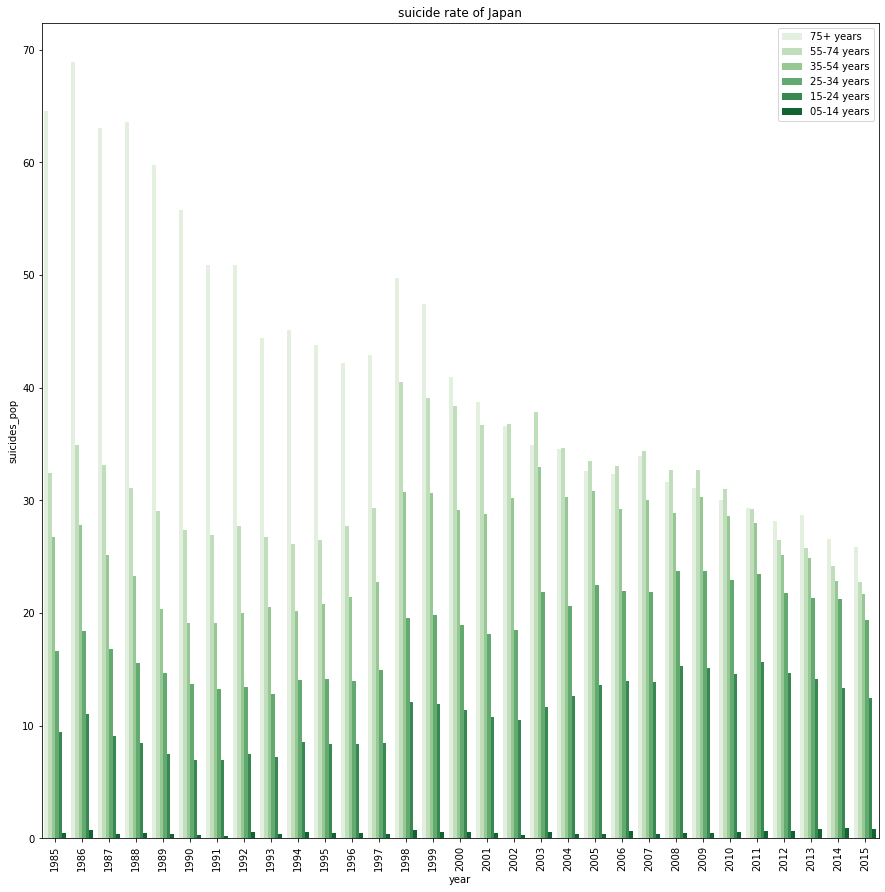

In [ ]:
plt.figure(figsize = (15,15))
sns.barplot(x="year", y="suicides_pop", hue="age",
            ci = None,data = (df[df["country"] == "Japan"]), palette = 'Greens' )
plt.xticks(rotation = 90)
plt.title("suicide rate of Japan" )
plt.legend()    
plt.show()

## Multivariate analysis

Text(0.5, 0.98, 'Suicide number evolution from 1985 to 2015 according to age range')

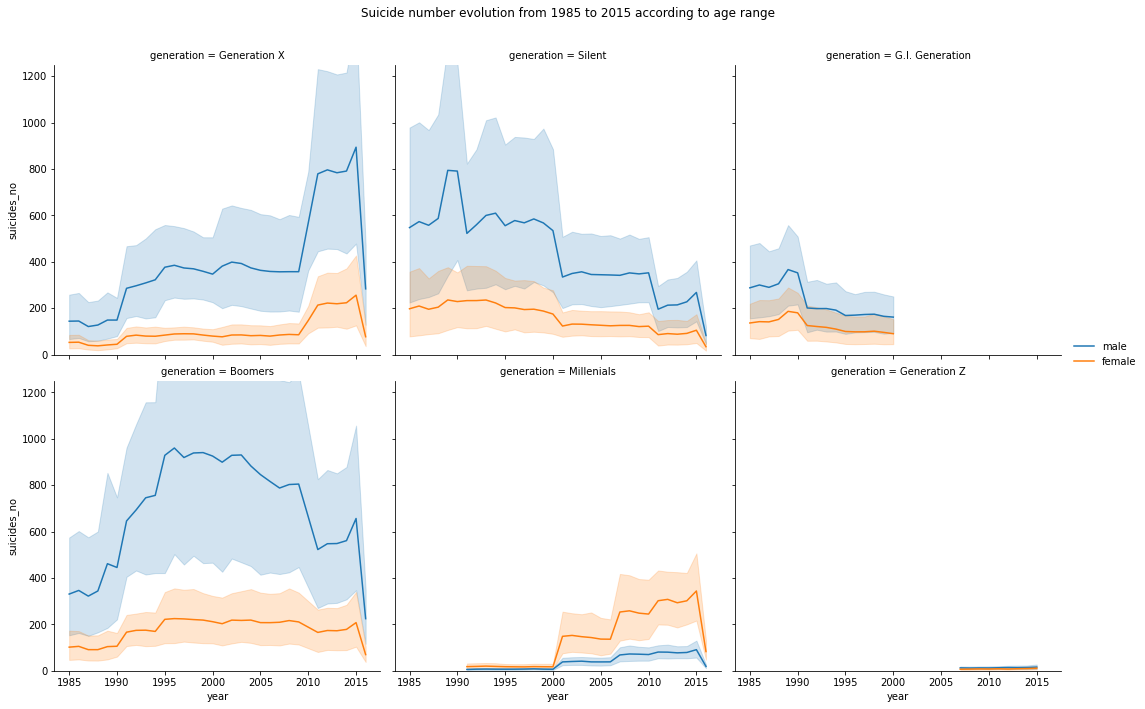

In [ ]:
g = sns.FacetGrid(df, col="generation", height=5, col_wrap=3)
#g.map_dataframe(sns.scatterplot, x="year", y="suicides_no", hue="sex")
g.map_dataframe(sns.lineplot , x="year", y="suicides_no", hue="sex")
plt.ylim(0, 1250)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Suicide number evolution from 1985 to 2015 according to age range')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


Text(0.5, 0.98, 'Relationships between variables')

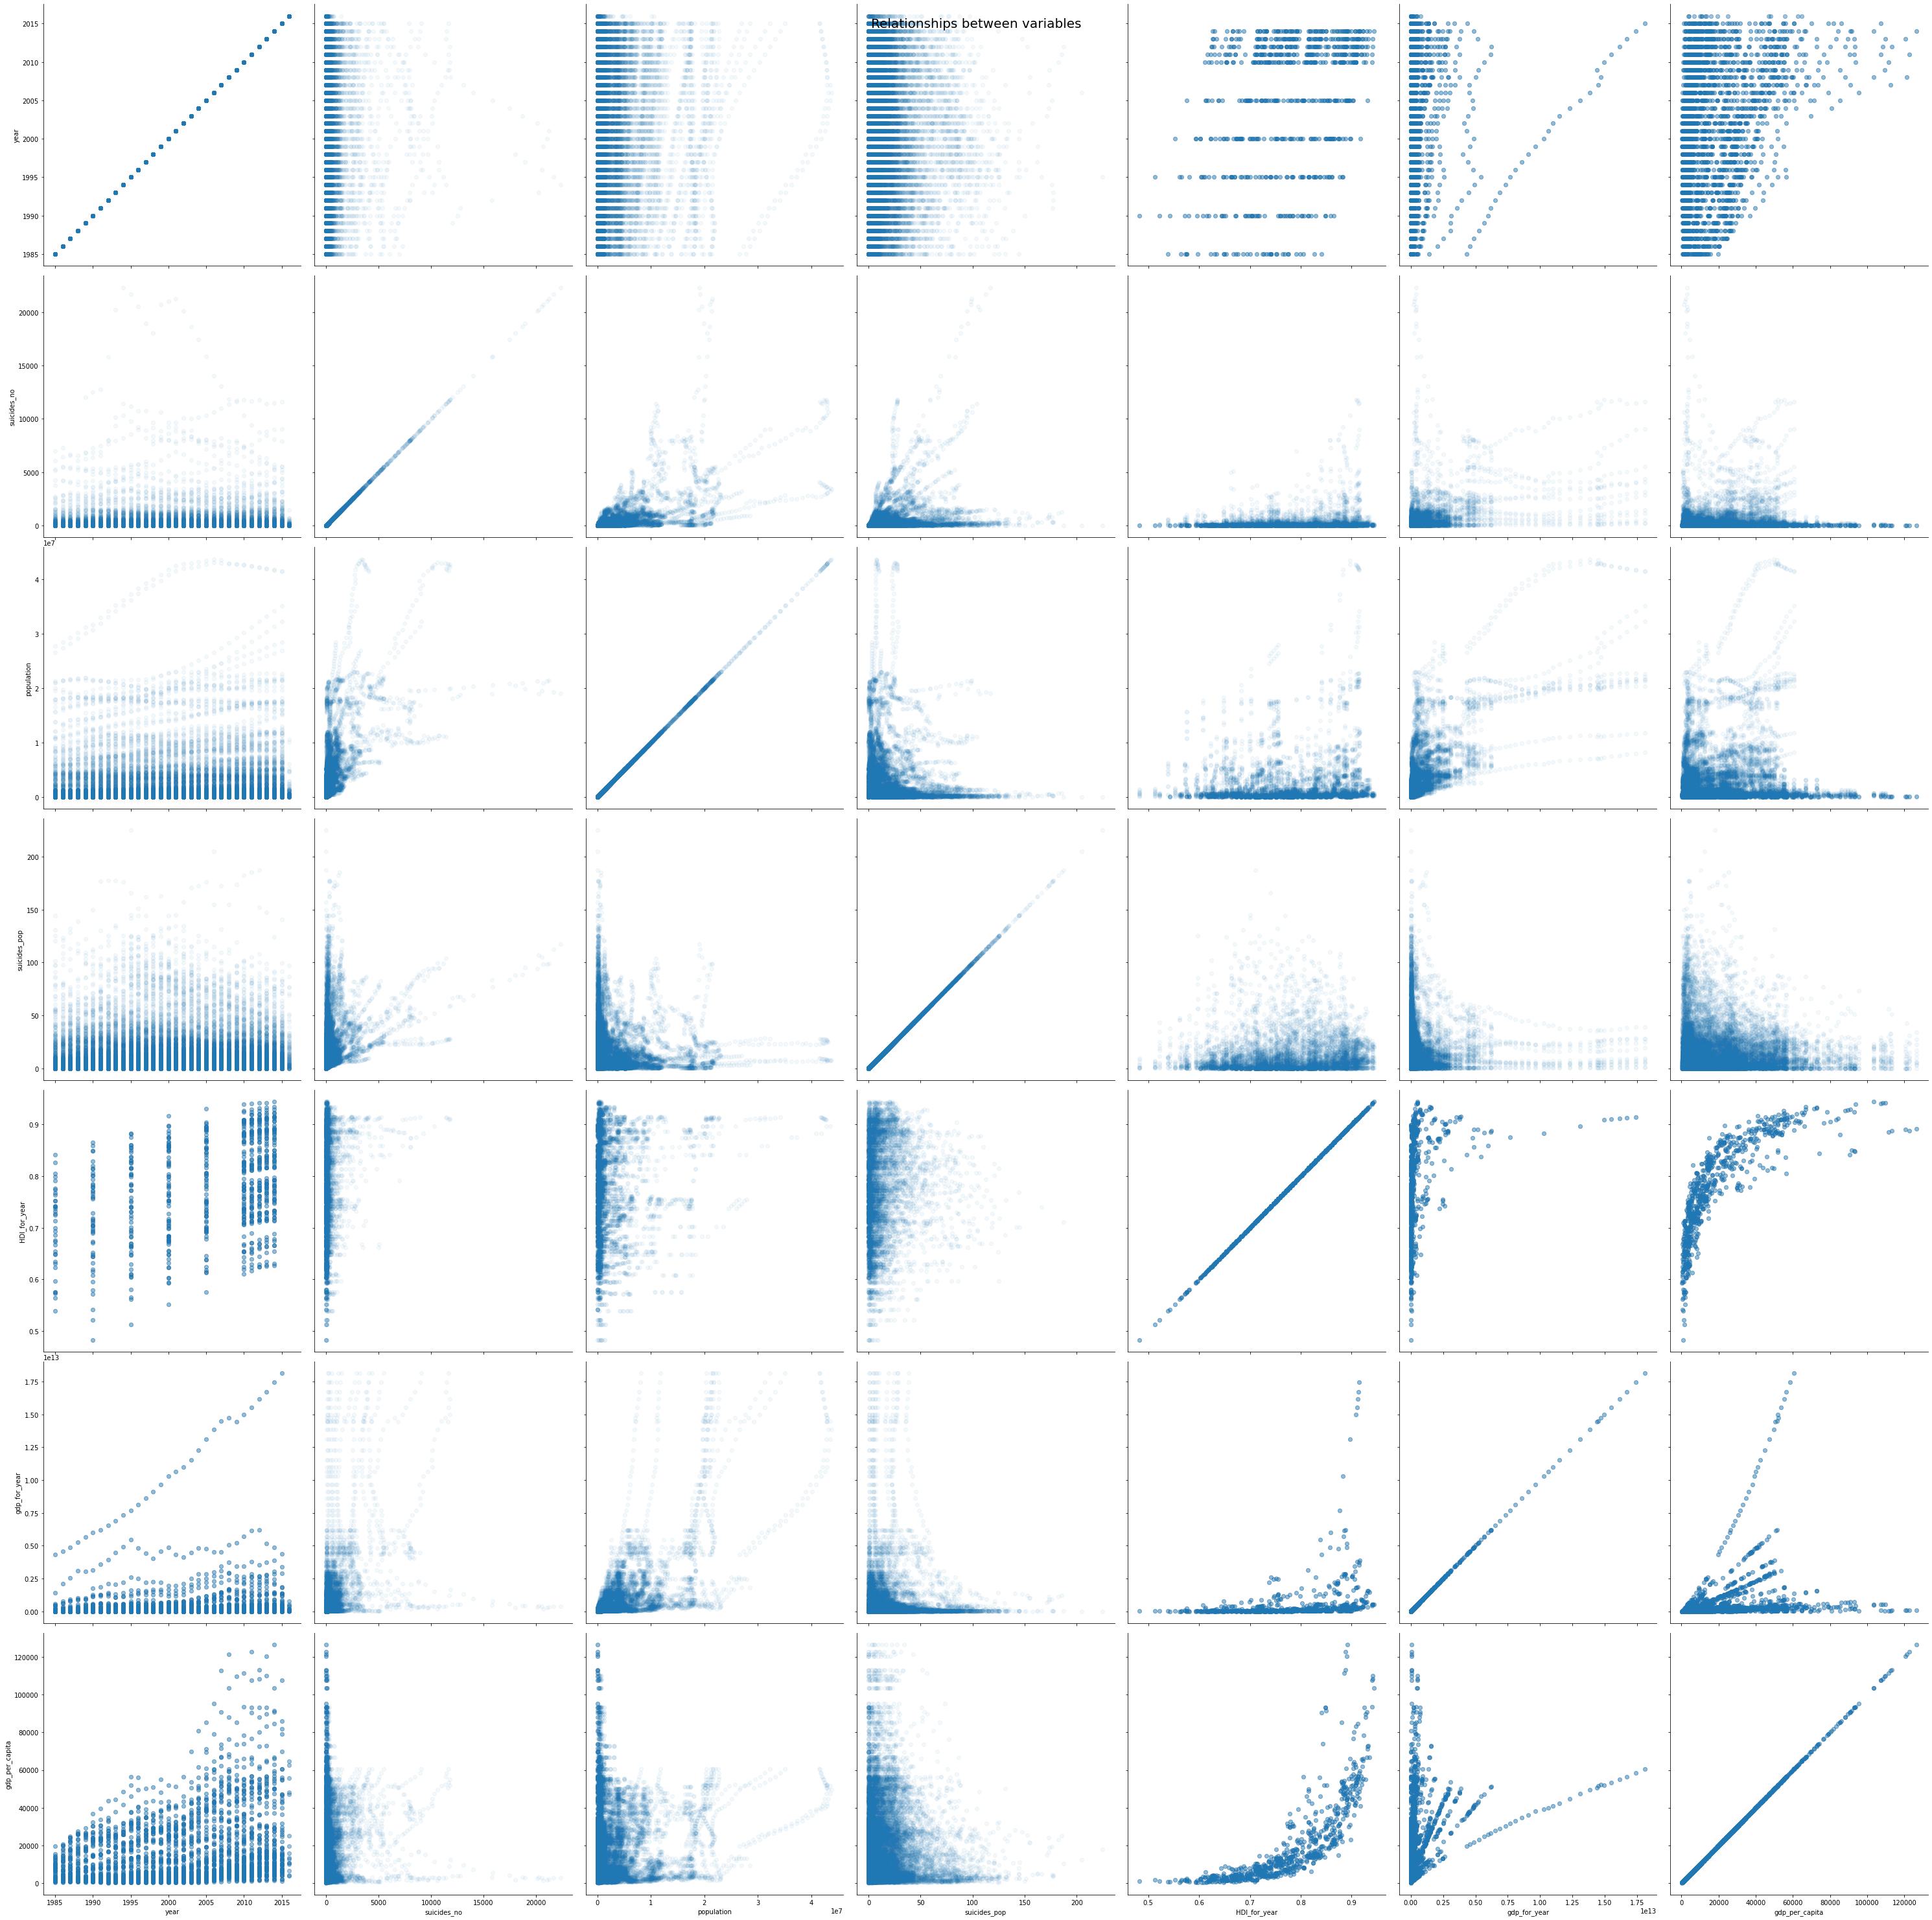

In [ ]:
g = sns.PairGrid(df,size=6)
g.map(plt.scatter,  alpha=0.05) #All the grids plot scatter plot
g.fig.subplots_adjust()
g.fig.suptitle('Relationships between variables', fontsize = 20)



Text(0.5, 0.98, 'Relationships between variables sex by sex')

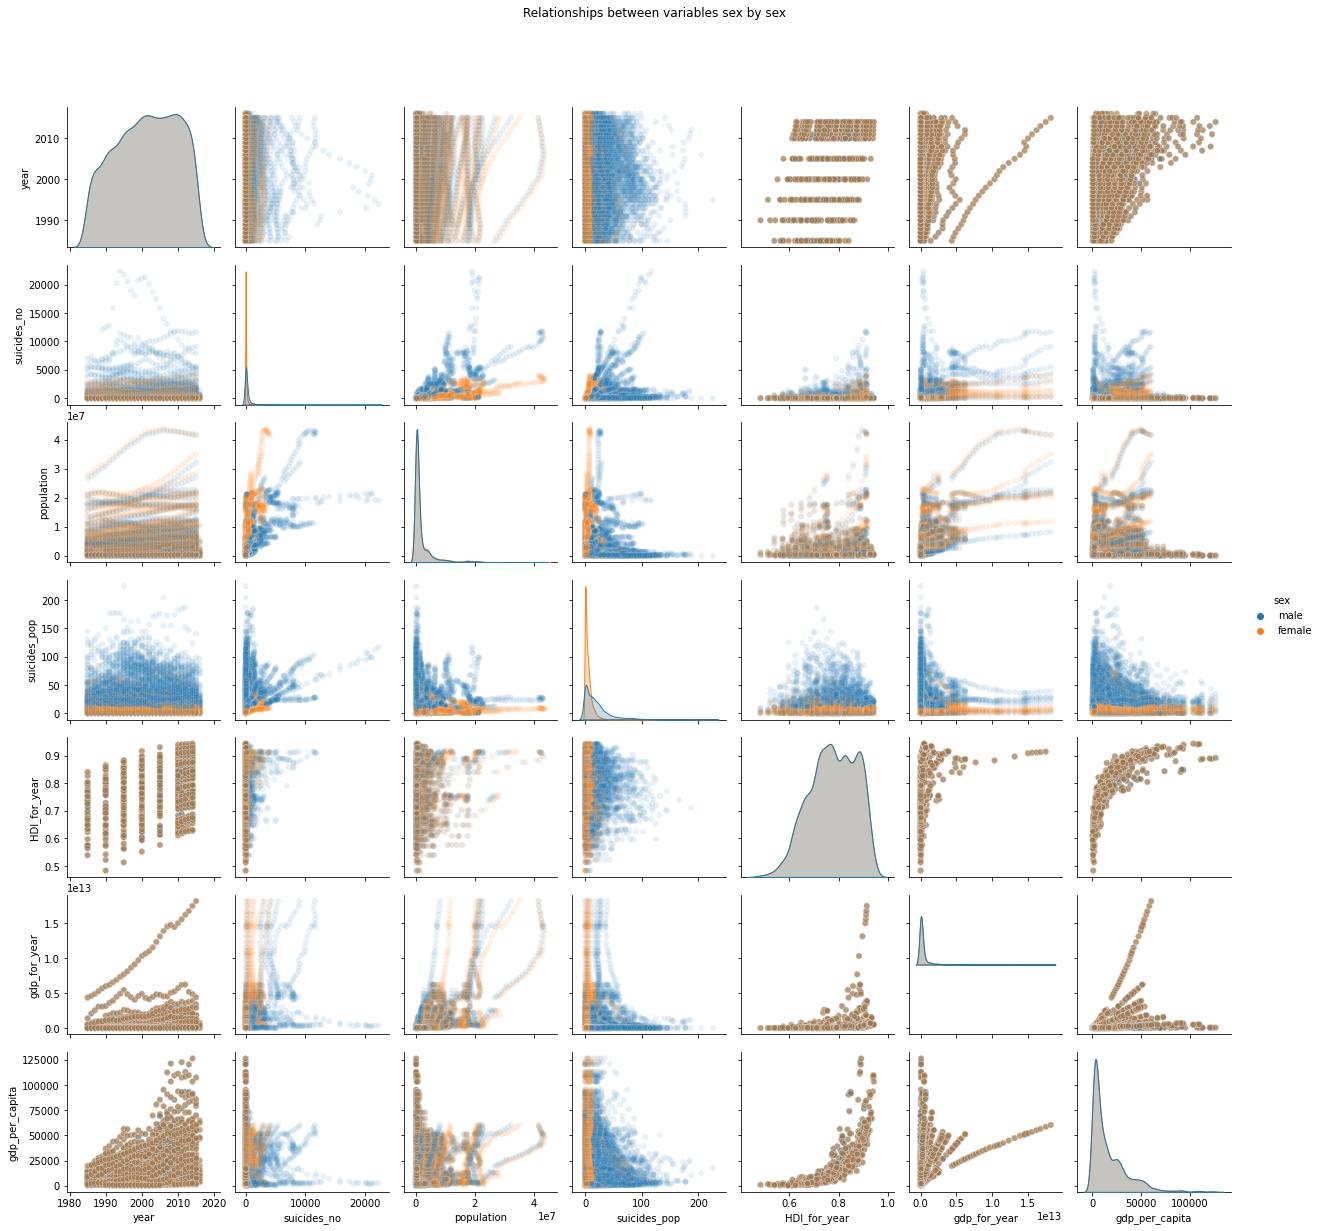

In [ ]:
g = sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.1}, hue ='sex')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationships between variables sex by sex')
